<div style="text-align: center;">
    <font color="red" size="+3">Partie 2: Analyse exploratoire des données</font>
</div>

# Import des bib necessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pingouin as pg
from scipy.stats import kruskal

# Import des données

In [3]:
df=pd.read_csv('data_nettoyer_final.csv')

# Analyse univarié

## Data distrbution

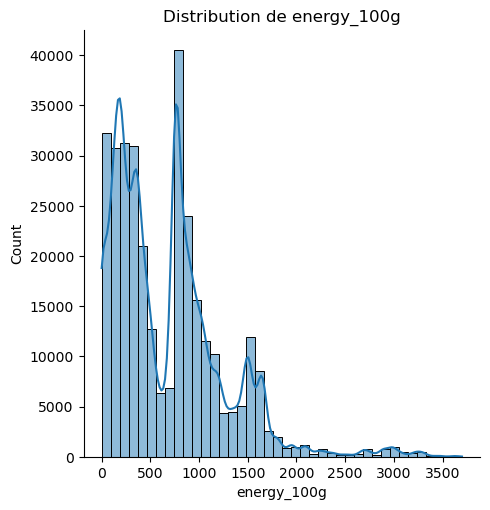

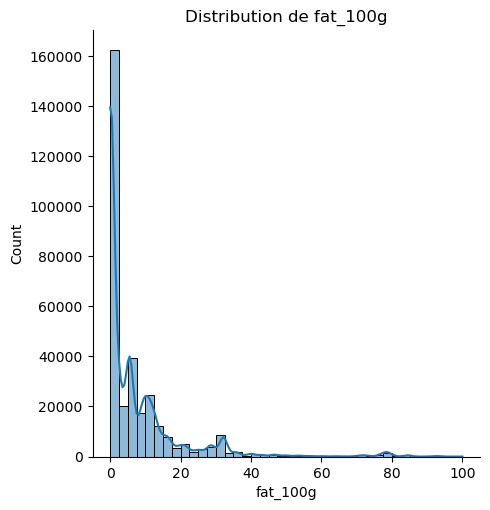

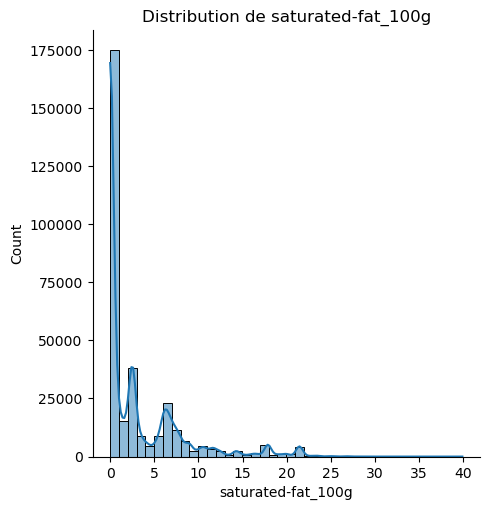

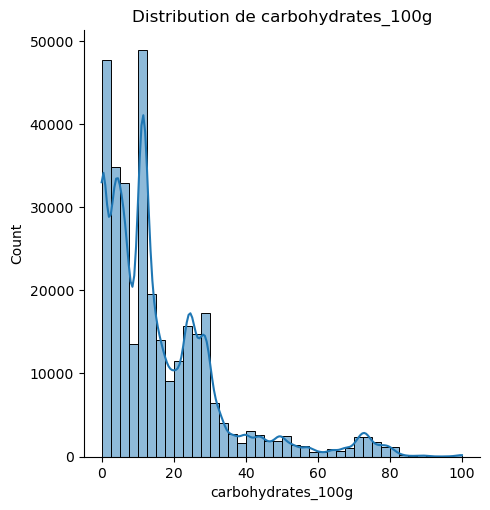

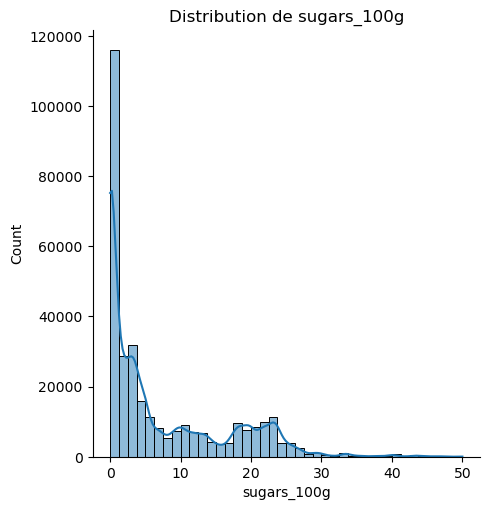

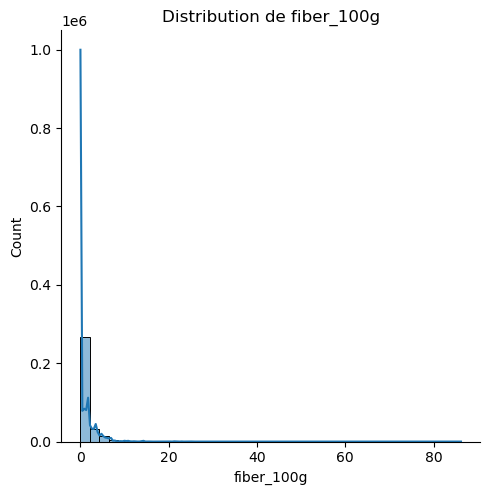

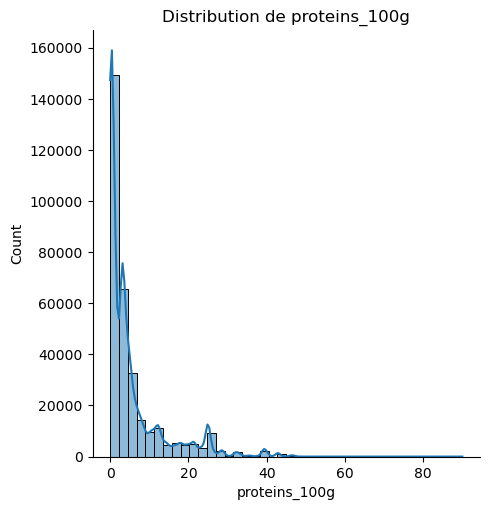

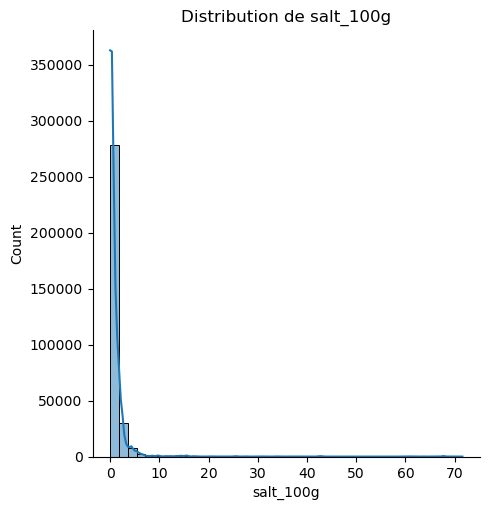

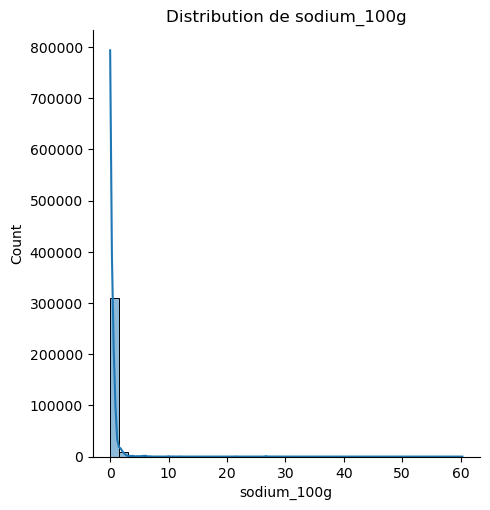

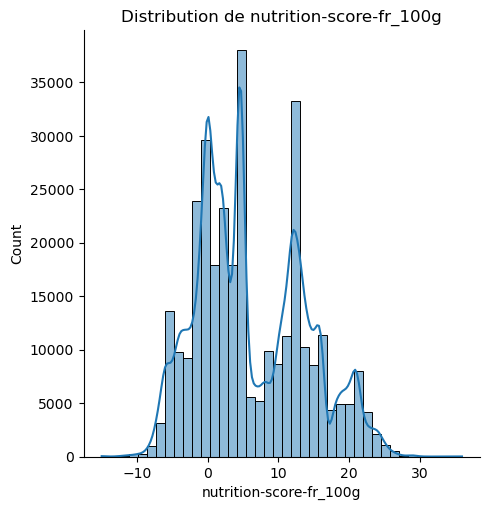

In [4]:
numerique_colonnes=df.select_dtypes(include='number')

for colonne in numerique_colonnes.columns:
    sns.displot(df[colonne],kde=True,bins=40)
    plt.title(f'Distribution de {colonne}')
    plt.show()

On peut constater que la plupart des distribution sont des distribution bimodale ou trimodale cela indique que les données sont caractérisées par des groupes distincts. 
Chaque pic représente le mode ou le pic le plus fréquent de chaque groupe.

## Produits

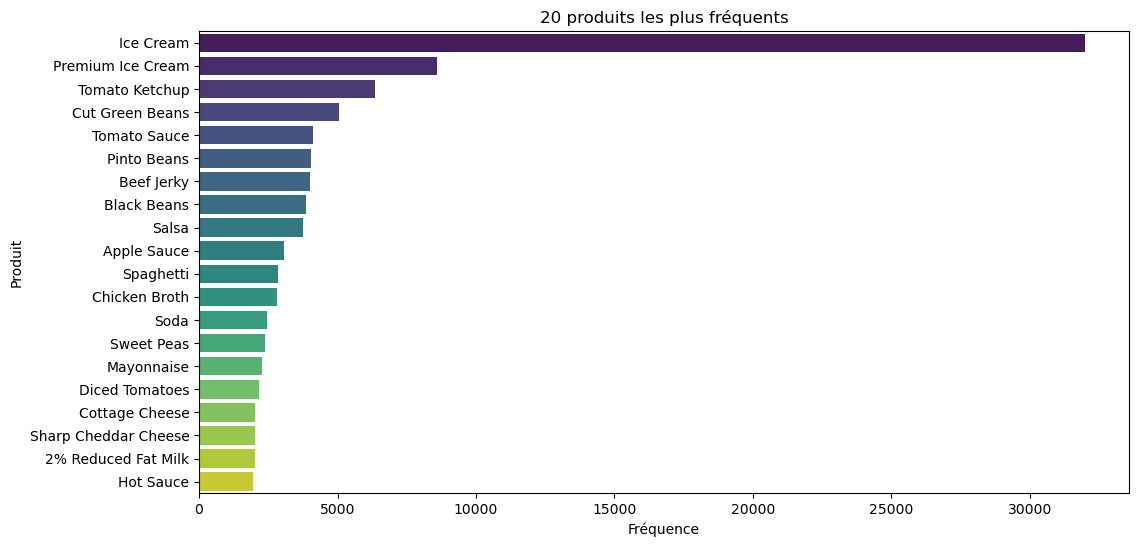

In [6]:
# 20 produits les plus fréquents
produits_counts = df['product_name'].value_counts().head(20).reset_index()
produits_counts.columns = ['product_name', 'Fréquence']

plt.figure(figsize=(12, 6))
sns.barplot(x='Fréquence', y='product_name', data=produits_counts, palette='viridis')

plt.xlabel('Fréquence')
plt.ylabel('Produit')
plt.title('20 produits les plus fréquents')
plt.show()

## Nutrition Grade

Text(0.5, 1.0, 'Répartition des grades nutritionnels')

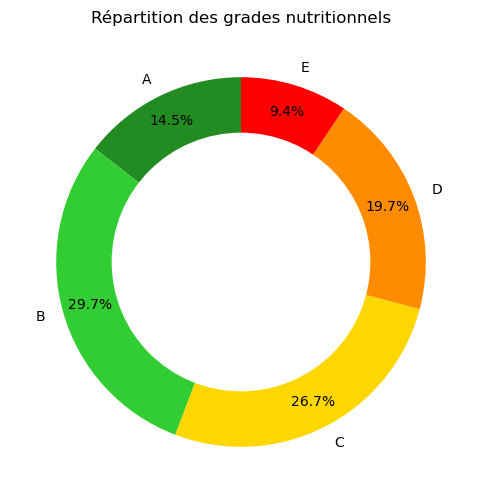

In [9]:
Ordre = ['A', 'B', 'C', 'D', 'E']
Somme_grade = df['nutrition_grade_fr'].value_counts().loc[Ordre]
Coleur = {'A': 'forestgreen', 'B': 'limegreen', 'C': 'gold', 'D': 'darkorange', 'E': 'red'}  
plt.figure(figsize=(6, 6))
plt.pie(Somme_grade, labels=Somme_grade.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[Coleur[x] for x in Somme_grade.index])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Répartition des grades nutritionnels')

# Analyse bivarié

## Numérique-Numérique

### Scater Plot

In [27]:
numeriq = df.select_dtypes(include=['int64','float64','Int64'])[:]

In [10]:
numeriq.columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition_grade'],
      dtype='object')

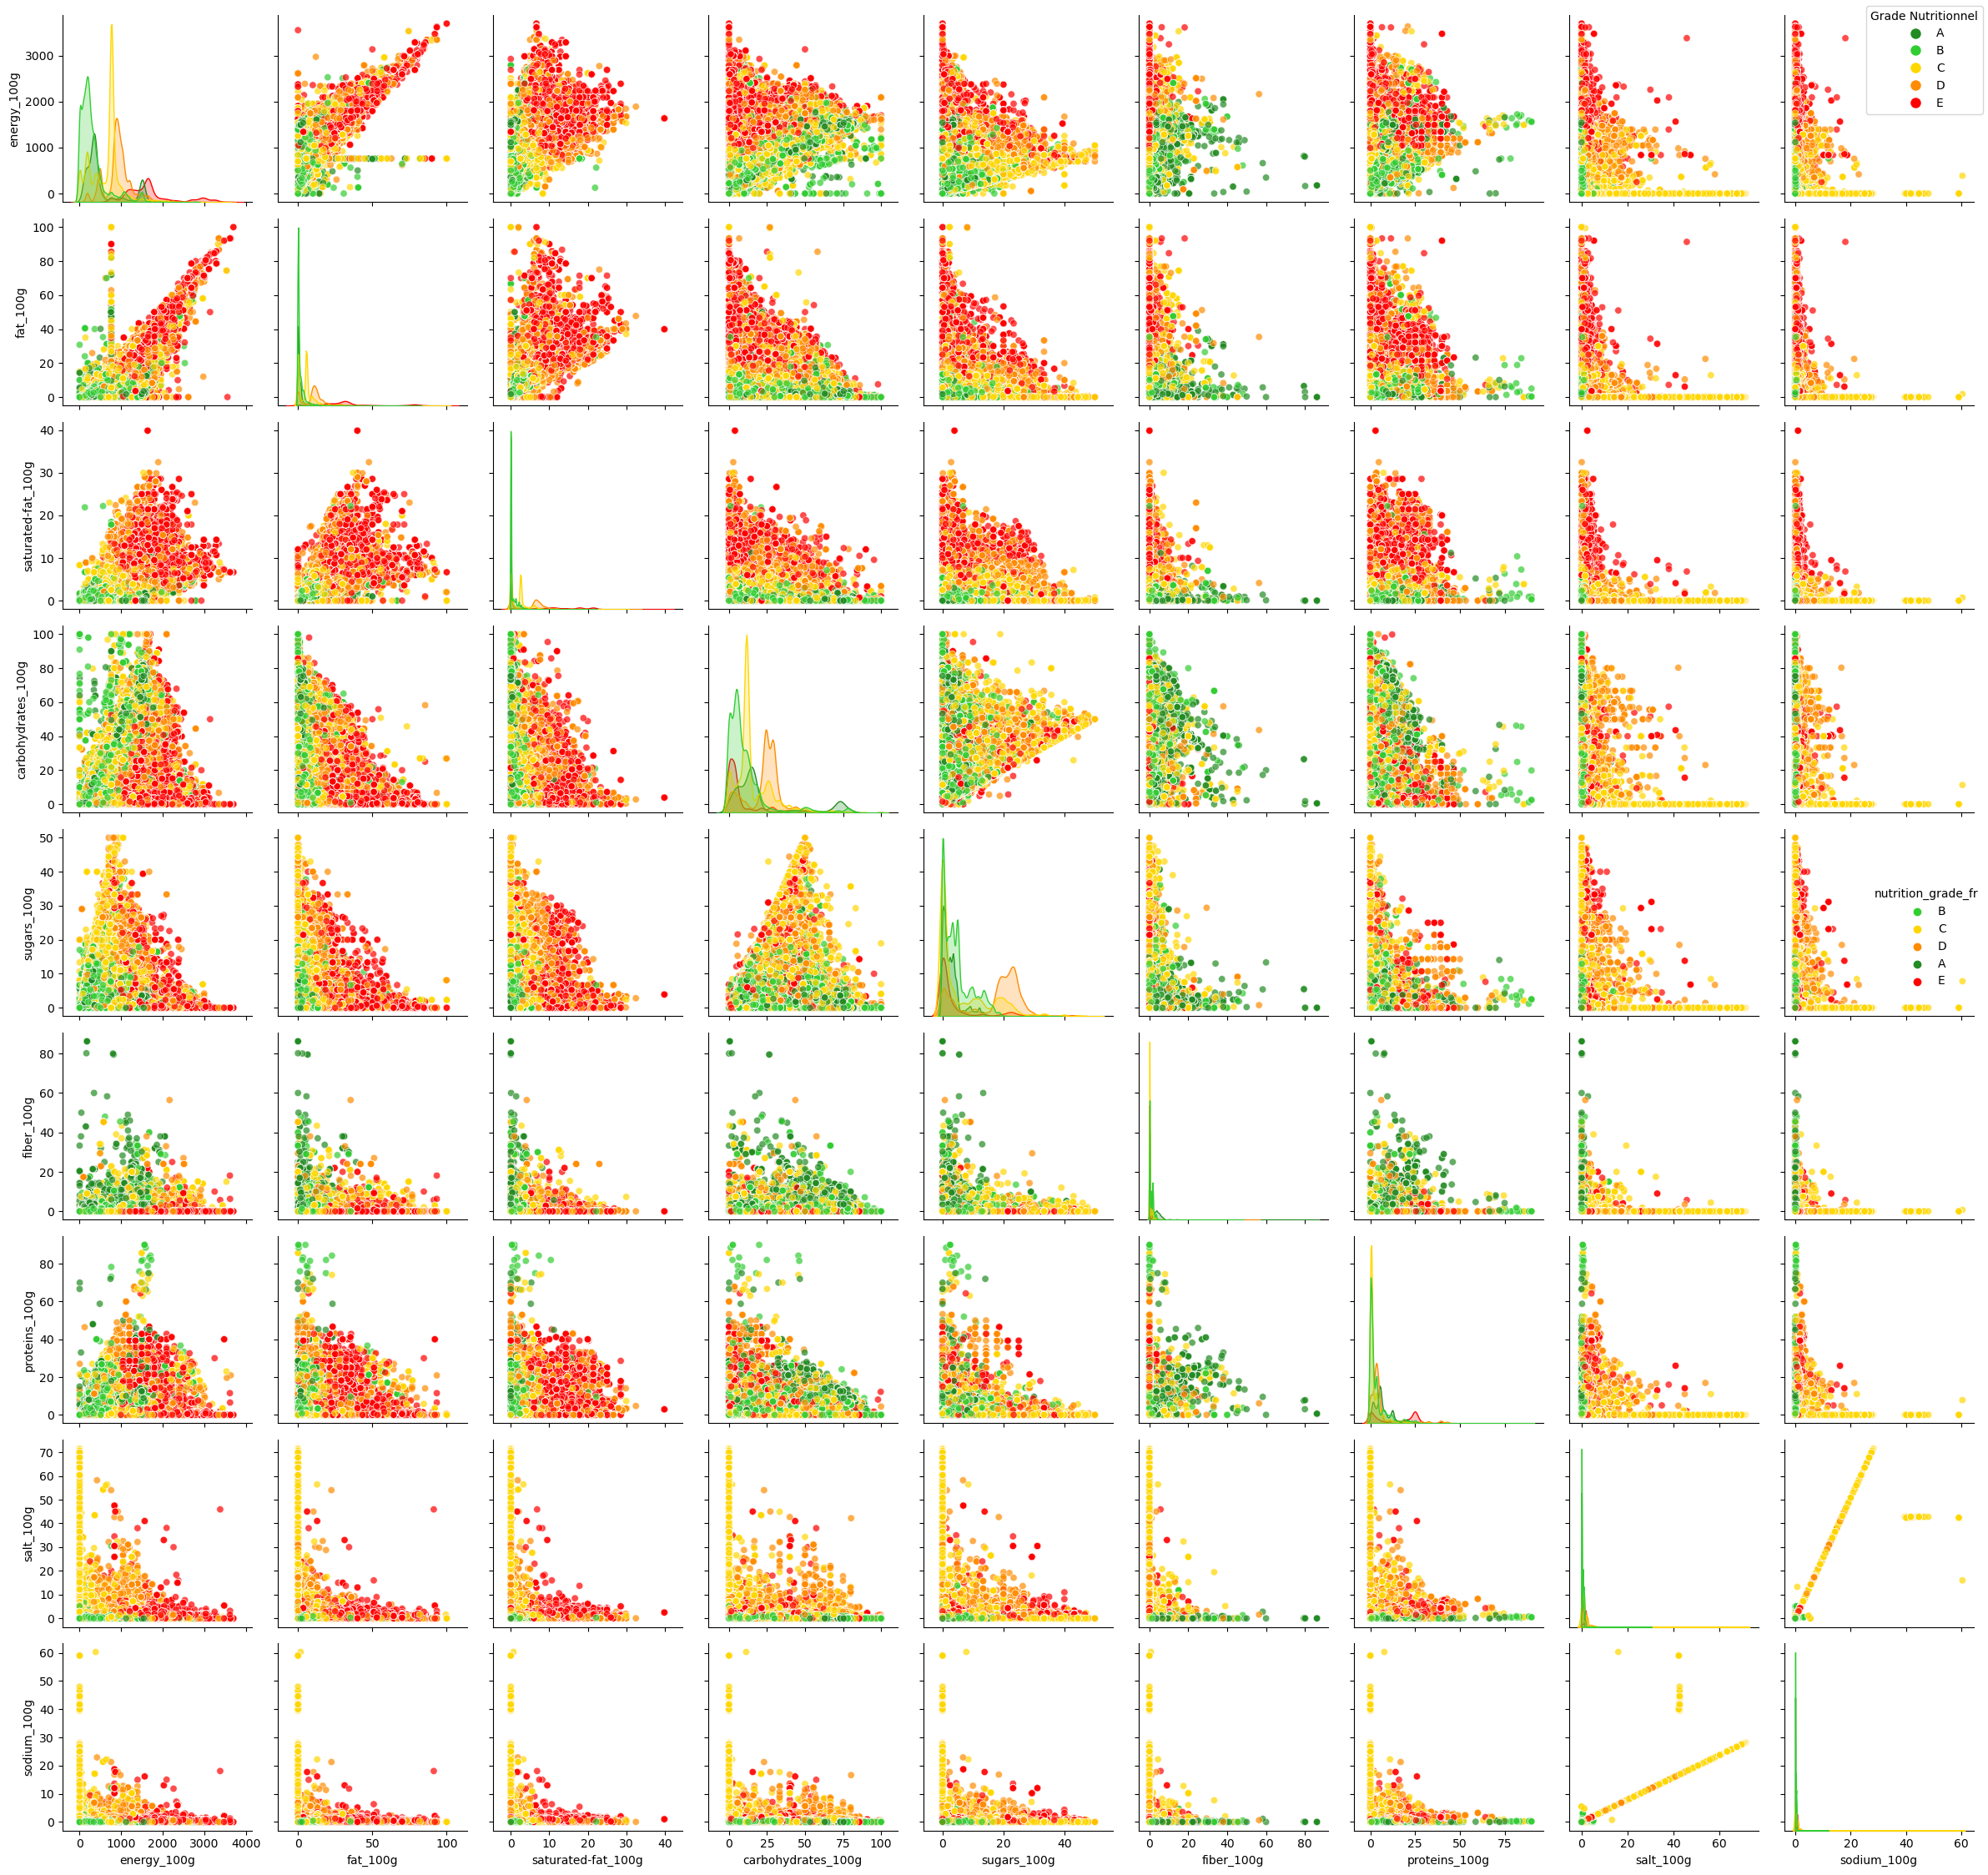

In [28]:
colonnes_numeriques = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g']
df_numeriques = df[colonnes_numeriques + ['nutrition_grade_fr']]
g = sns.pairplot(df_numeriques, hue='nutrition_grade_fr', palette=Coleur, plot_kws={'alpha': 0.7})
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=Coleur[grade], markersize=10, label=grade) for grade in ordre]
g.fig.legend(handles=legend_labels, title='Grade Nutritionnel', loc='upper right')
plt.tight_layout()
plt.show()

### Corrélation 

In [17]:
correlation = numeriq.corr()
correlation

energy_100g  fat_100g  saturated-fat_100g  \
energy_100g                 1.000000  0.822543            0.648994   
fat_100g                    0.822543  1.000000            0.729531   
saturated-fat_100g          0.648994  0.729531            1.000000   
carbohydrates_100g          0.384396 -0.096738           -0.096578   
sugars_100g                 0.037359 -0.070747            0.053309   
fiber_100g                  0.039073 -0.101750           -0.185720   
proteins_100g               0.400155  0.241747            0.395359   
salt_100g                   0.009300  0.023294           -0.007248   
sodium_100g                -0.005801  0.015182           -0.010281   
nutrition-score-fr_100g     0.599998  0.648339            0.712732   

                         carbohydrates_100g  sugars_100g  fiber_100g  \
energy_100g                        0.384396     0.037359    0.039073   
fat_100g                          -0.096738    -0.070747   -0.101750   
saturated-fat_100g                -0.096578     0.053309   -0.185720   
carbohydrates_100g                 1.000000     0.374683    0.268852   
sugars_100g                        0.374683     1.000000   -0.134151   
fiber_100g                         0.268852    -0.134151    1.000000   
proteins_100g                     -0.001890    -0.183197    0.085246   
salt_100g                         -0.070859    -0.085912   -0.048006   
sodium_100g                       -0.061755    -0.065240   -0.036416   
nutrition-score-fr_100g            0.003500     0.348577   -0.392764   

                         proteins_100g  salt_100g  sodium_100g  \
energy_100g                   0.400155   0.009300    -0.005801   
fat_100g                      0.241747   0.023294     0.015182   
saturated-fat_100g            0.395359  -0.007248    -0.010281   
carbohydrates_100g           -0.001890  -0.070859    -0.061755   
sugars_100g                  -0.183197  -0.085912    -0.065240   
fiber_100g                    0.085246  -0.048006    -0.036416   
proteins_100g                 1.000000   0.081808     0.067123   
salt_100g                     0.081808   1.000000     0.916600   
sodium_100g                   0.067123   0.916600     1.000000   
nutrition-score-fr_100g       0.236775   0.189387     0.158575   

                         nutrition-score-fr_100g  
energy_100g                             0.599998  
fat_100g                                0.648339  
saturated-fat_100g                      0.712732  
carbohydrates_100g                      0.003500  
sugars_100g                             0.348577  
fiber_100g                             -0.392764  
proteins_100g                           0.236775  
salt_100g                               0.189387  
sodium_100g                             0.158575  
nutrition-score-fr_100g                 1.000000

#### Carte de corrélation

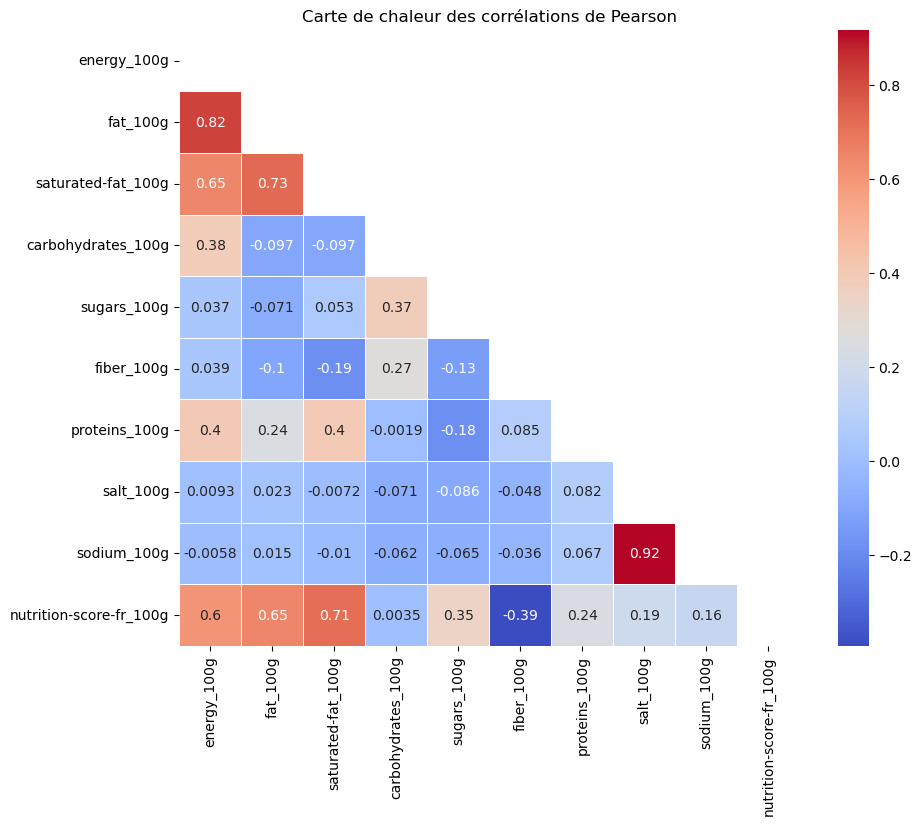

In [19]:
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Carte des corrélations de Pearson')
plt.show()

### Catégoriel-Catégoriel

#### Grade nutritionnel par produit

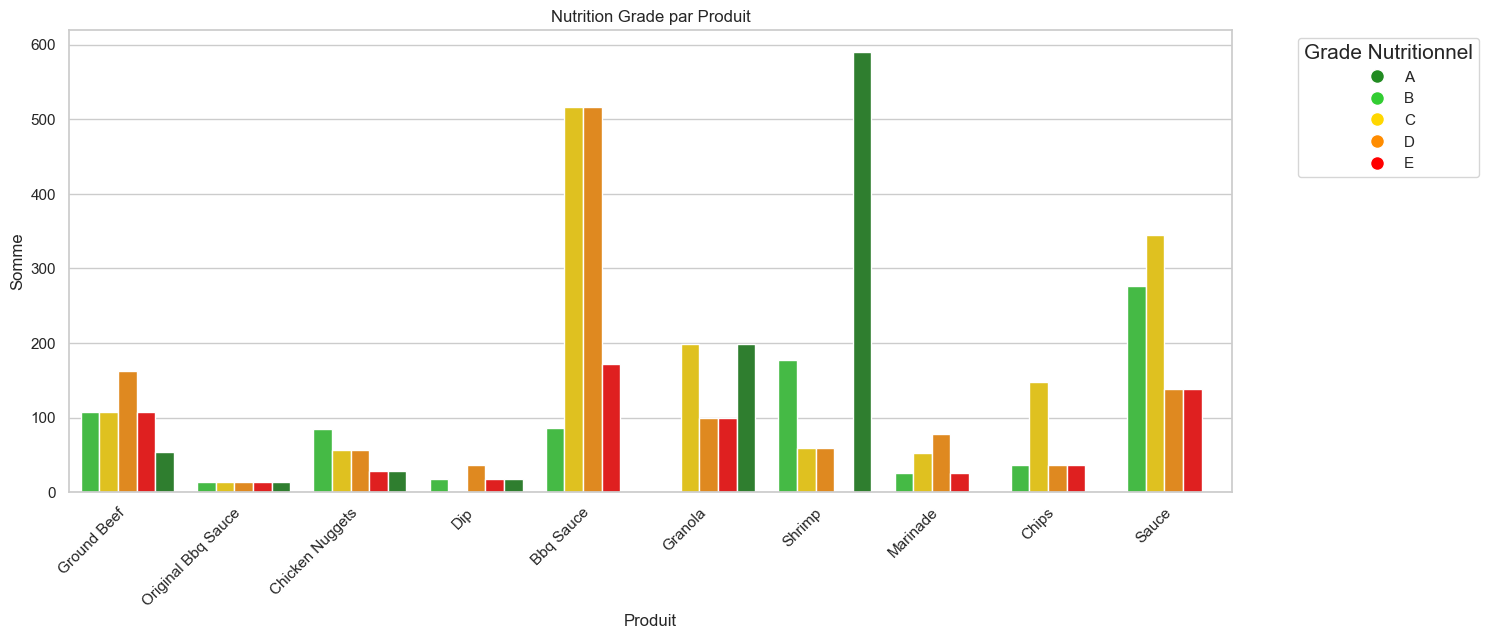

In [11]:
data = df.groupby(['product_name', 'nutrition_grade_fr']).size().reset_index(name='count')
top_10_produits = data['product_name'].value_counts().head(10).index
data_filtrer = data[data['product_name'].isin(top_10_produits)]
order = ['A', 'B', 'C', 'D', 'E']
colors = {'A': 'forestgreen', 'B': 'limegreen', 'C': 'gold', 'D': 'darkorange', 'E': 'red'}  
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6)) 
ax = sns.barplot(x="product_name", y="count", hue="nutrition_grade_fr", data=data_filtrer, palette=Coleur, order=top_10_produits)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Nutrition Grade par Produit')
plt.xlabel('Produit')
plt.ylabel('Somme')
legend_order = pd.Categorical(Ordre, categories=Coleur.keys(), ordered=True)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=Coleur[grade], markersize=10, label=grade) for grade in Ordre]
plt.legend(handles=legend_elements, title='Grade Nutritionnel', title_fontsize='15', bbox_to_anchor=(1.05, 1), loc='upper left', labels=legend_order)
plt.show()

#### Distribution des grades nutritionnels par catégorie PNNS

C:\Users\HP\AppData\Local\Temp\ipykernel_7488\1165444378.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


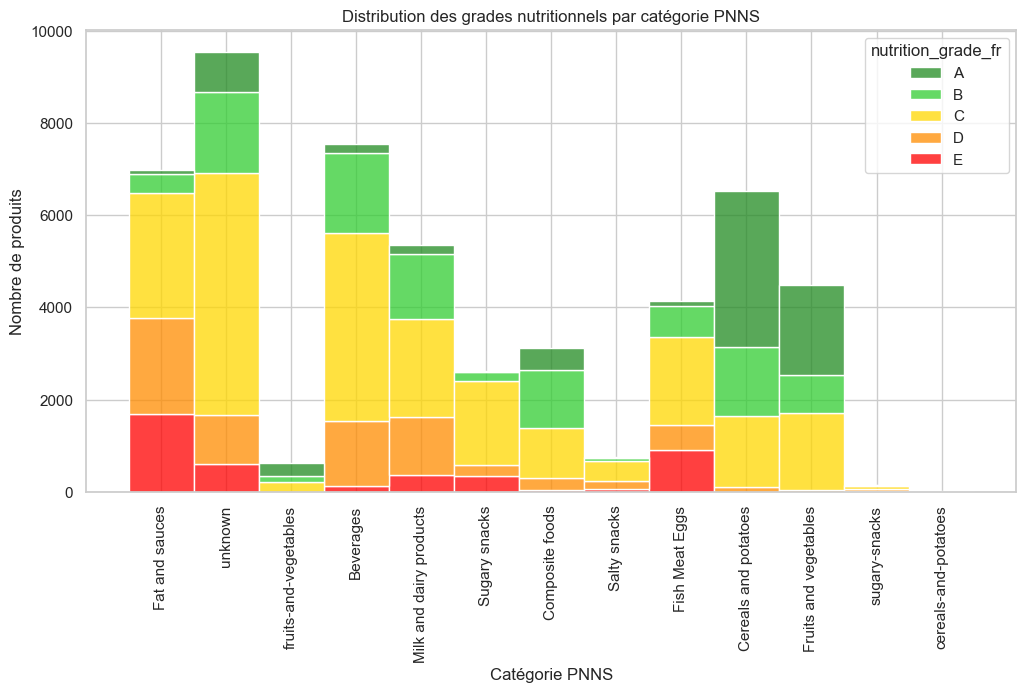

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Ajuster la taille de la figure si nécessaire
ax = sns.histplot(binwidth=0.5, x="pnns_groups_1", hue="nutrition_grade_fr", data=df, stat="count", multiple="stack", palette=Coleur, legend=True, hue_order=Ordre)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Distribution des grades nutritionnels par catégorie PNNS')
plt.xlabel('Catégorie PNNS')
plt.ylabel('Nombre de produits')
plt.show()

### Catégorical-Numerique

#### Distribution de "energy" pour le grade

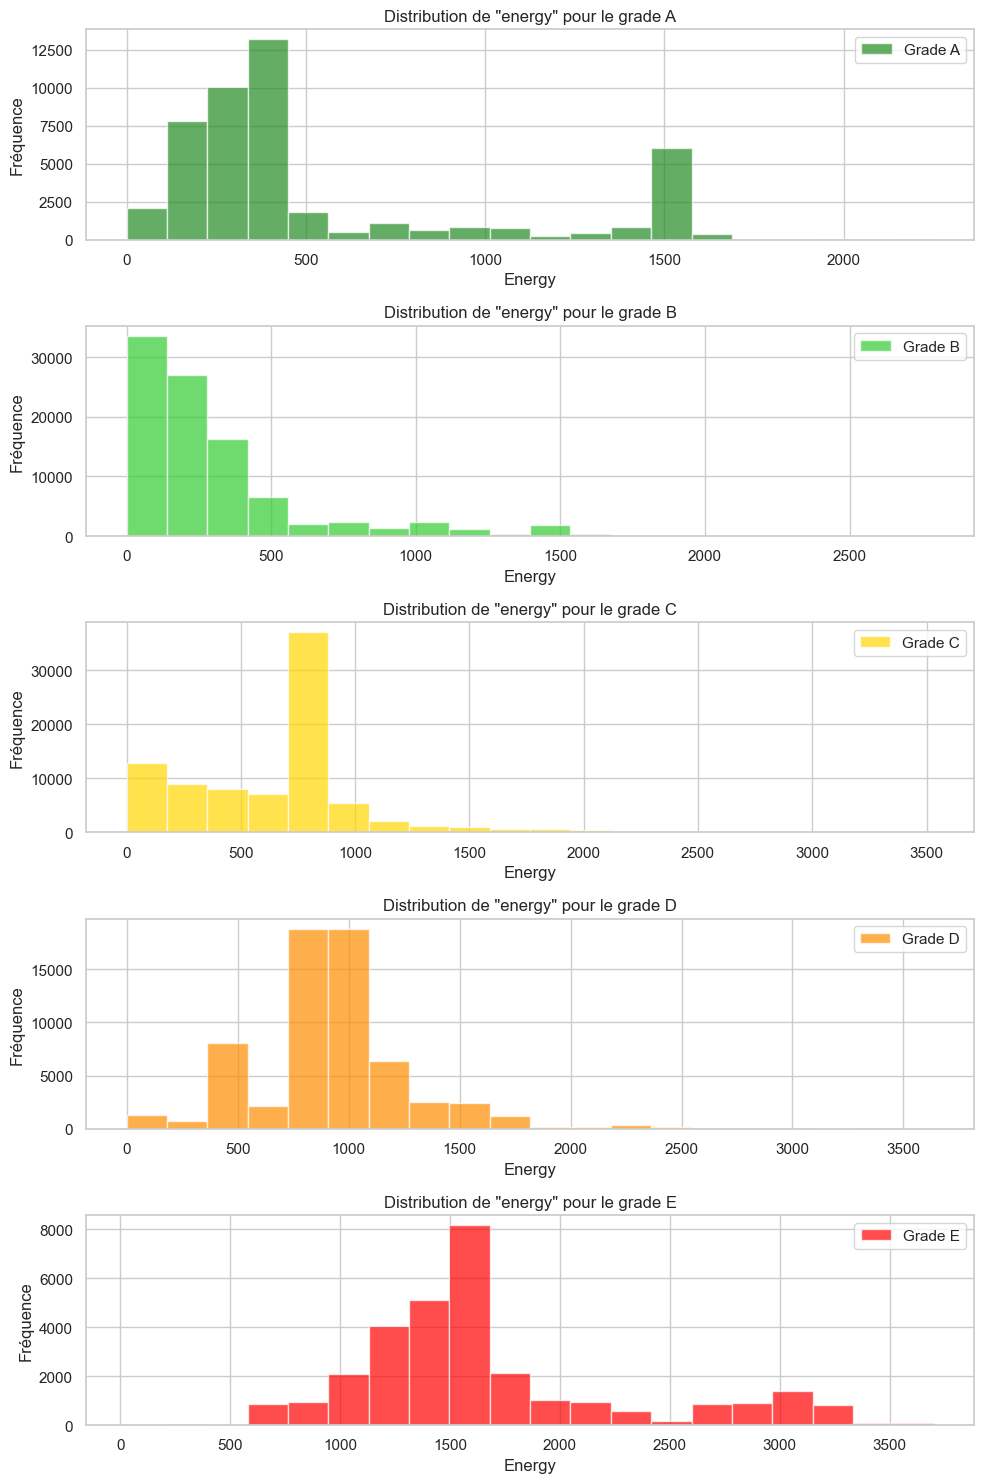

In [13]:
fig, axes = plt.subplots(nrows=len(Coleur), figsize=(10, 15))
for i, (grade, Coleur) in enumerate(Coleur.items()):
    subset = df[df['nutrition_grade_fr'] == grade]
    axes[i].hist(subset['energy_100g'], bins=20, alpha=0.7, label=f'Grade {grade}', color=Coleur)
    axes[i].set_title(f'Distribution de "energy" pour le grade {grade}')
    axes[i].set_xlabel('Energy')
    axes[i].set_ylabel('Fréquence')
    axes[i].legend()
plt.tight_layout()
plt.show()

#### Somme de graisse par Catégorie PNN2

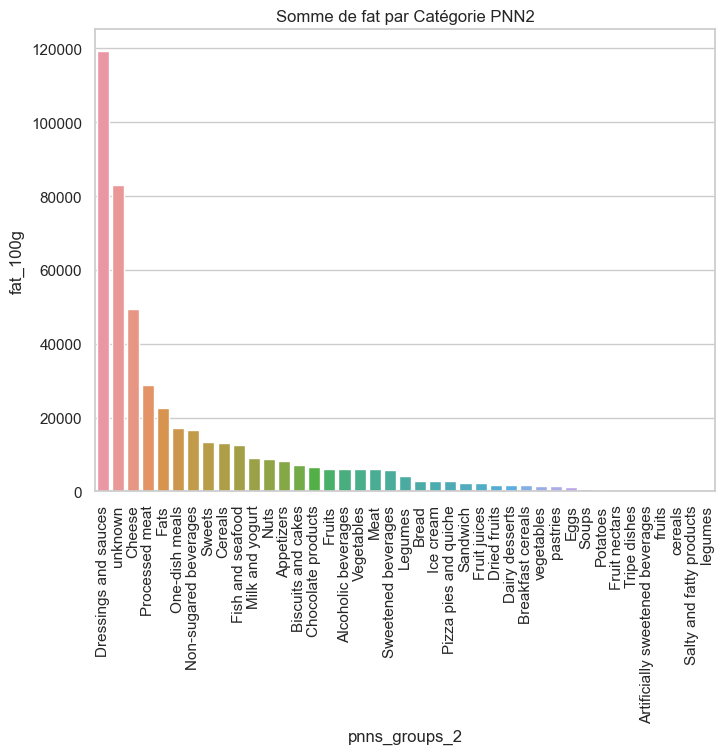

In [21]:
Somme_fat_par_PNN = df.groupby("pnns_groups_2")["fat_100g"].sum().reset_index()
Somme_fat_par_PNN_sorted = Somme_fat_par_PNN.sort_values(by="fat_100g", ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x="pnns_groups_2", y="fat_100g", data=Somme_fat_par_PNN_sorted, order=Somme_fat_par_PNN_sorted["pnns_groups_2"])
plt.title("Somme de fat par Catégorie PNN2")
plt.xticks(rotation=90)
plt.show()

#### Répartition des colonnes par Grade Nutritionnel

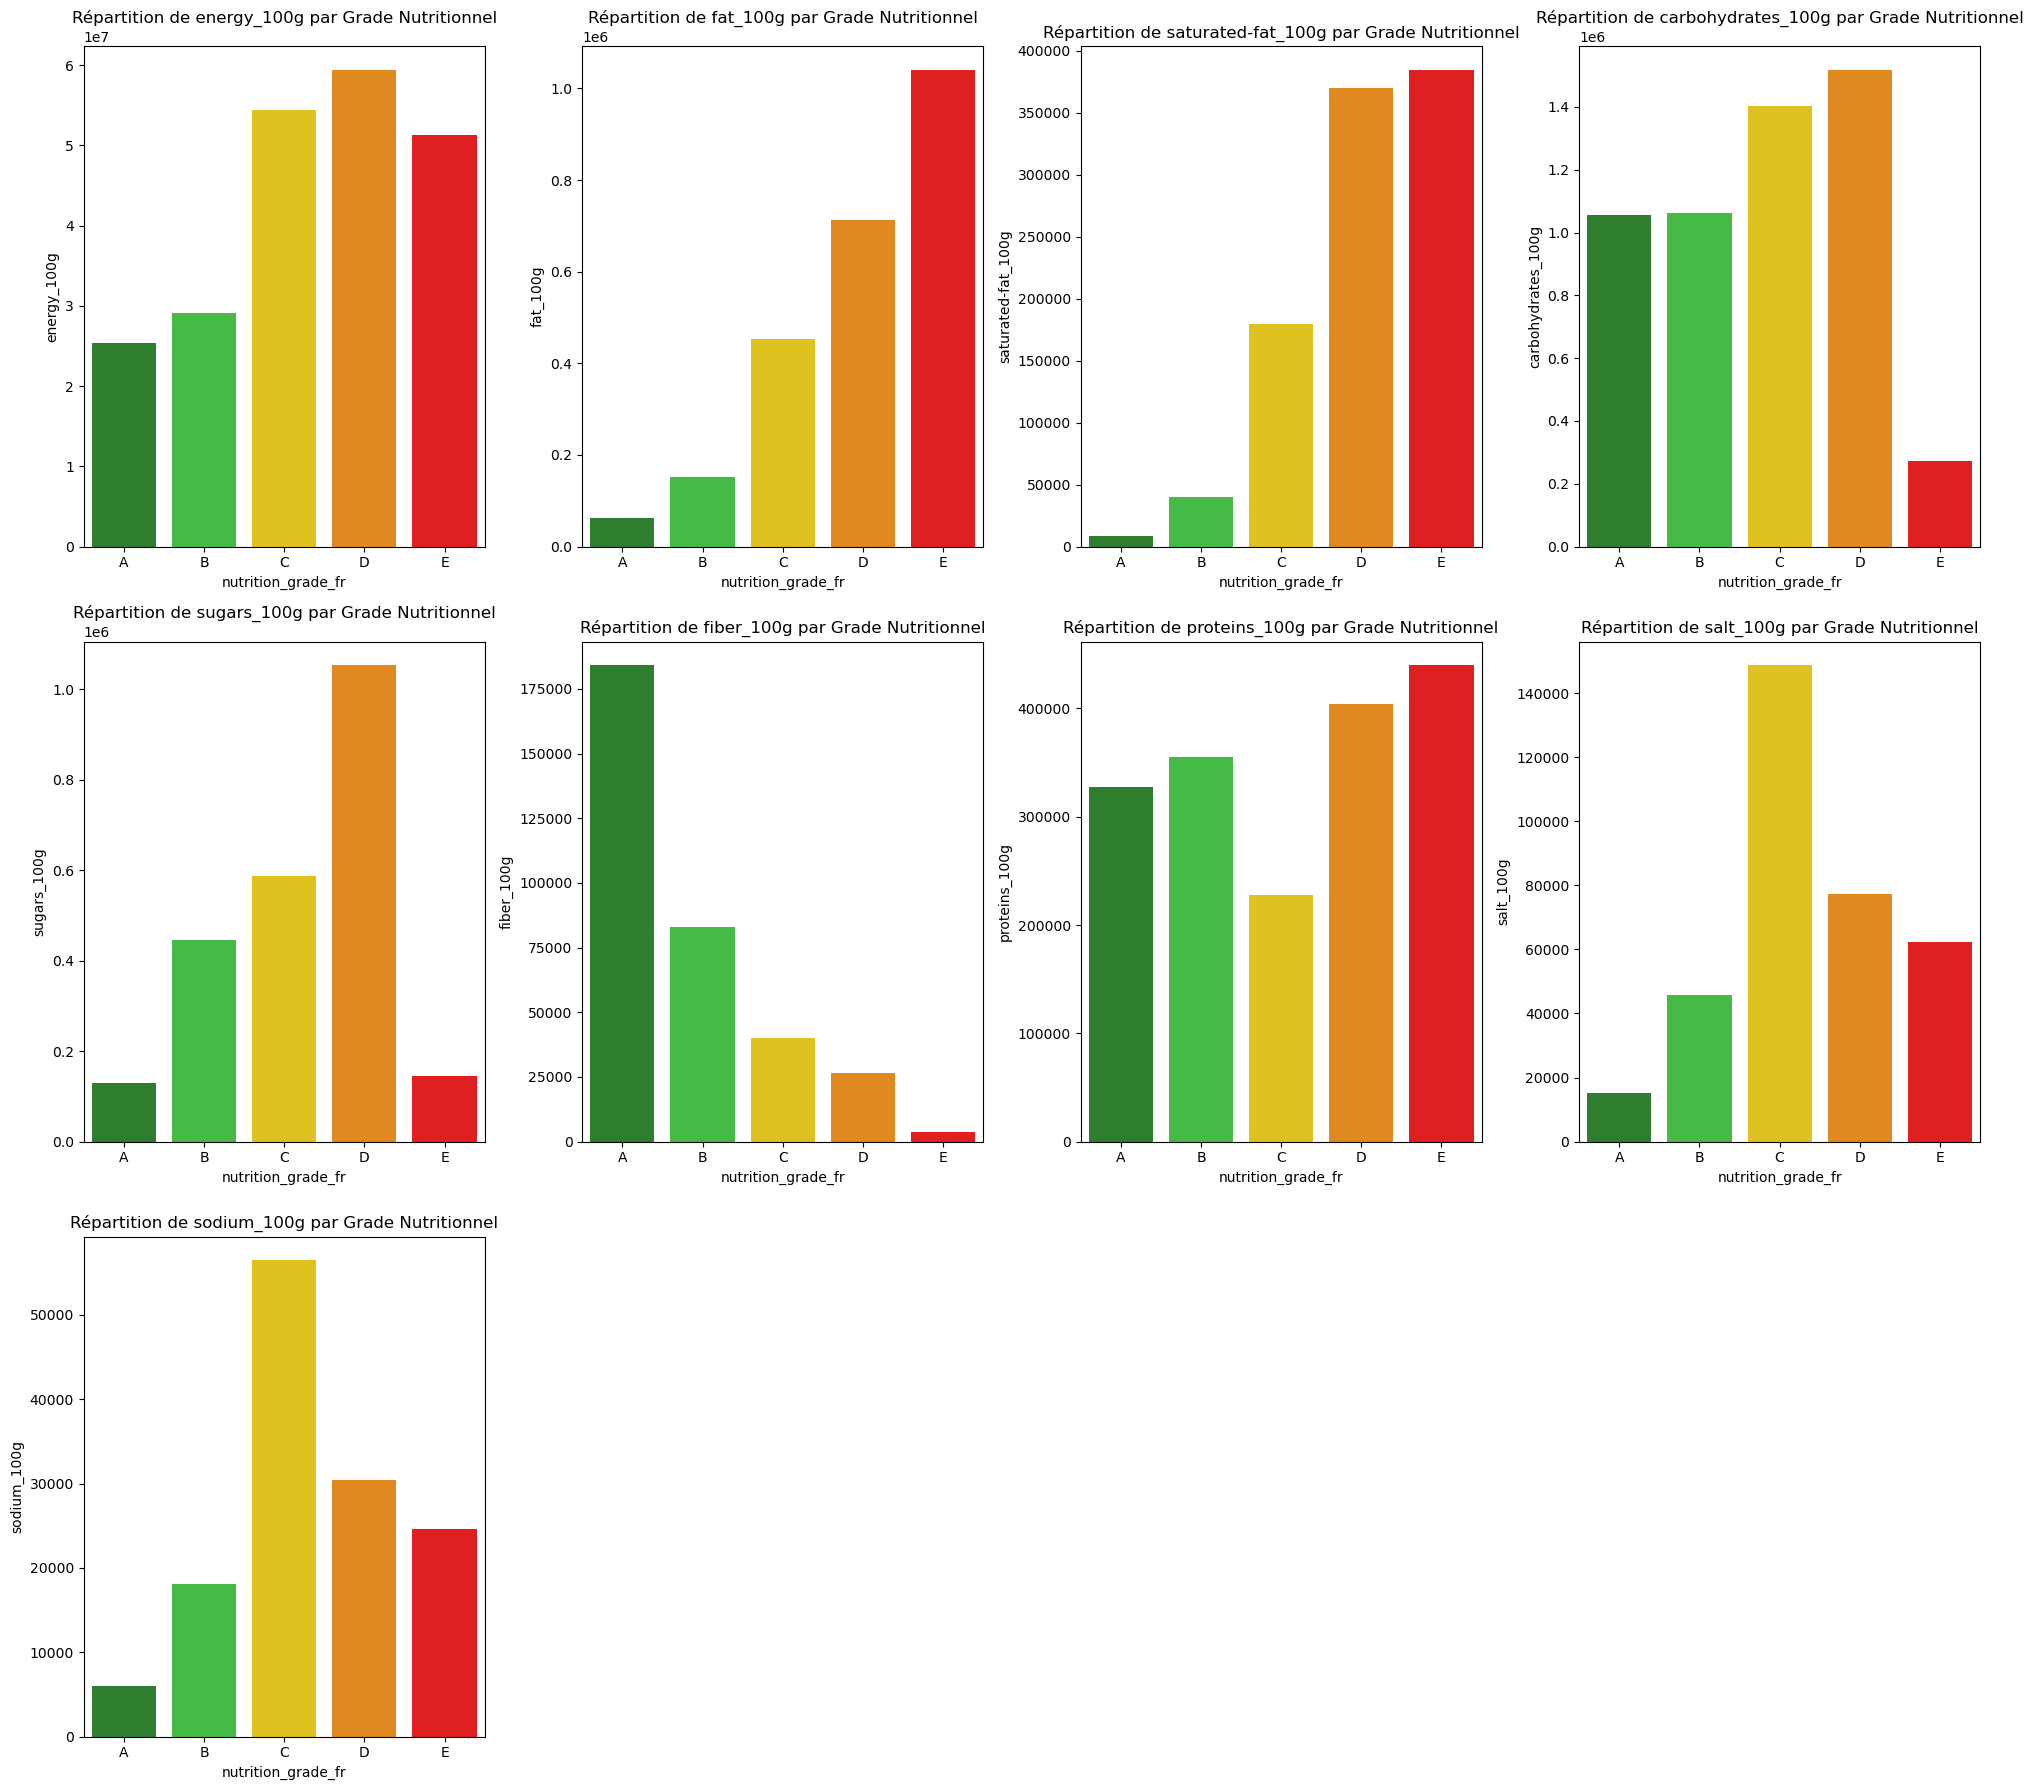

In [9]:
colonnes_numeriques = ['energy_100g','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g','fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']
colors = {'A': 'forestgreen', 'B': 'limegreen', 'C': 'gold', 'D': 'darkorange', 'E': 'red'}
nombre_graphe_par_ligne = len(colonnes_numeriques) // 4 + (len(colonnes_numeriques) % 4 > 0)
fig, axes = plt.subplots(nrows=nombre_graphe_par_ligne, ncols=4, figsize=(20, 6 * nombre_graphe_par_ligne))
axes = axes.flatten()
for i, column in enumerate(colonnes_numeriques):
    df_grouped = df.groupby("nutrition_grade_fr")[column].sum().reset_index()
    sns.barplot(x="nutrition_grade_fr", y=column, data=df_grouped, palette=df_grouped['nutrition_grade_fr'].map(Coleur), ax=axes[i])
    axes[i].set_title(f"Répartition de {column} par Grade Nutritionnel")
for j in range(len(colonnes_numeriques), nombre_graphe_par_ligne * 4):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Analyse Multivarié

## PCA

### Normalisation

In [28]:
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(numeriq)

### Graphe Eboulis

Pour évaluer le nombre optimal de composantes nécessaires à notre analyse, nous allons examiner le graphique d'éboulis des valeurs propres 

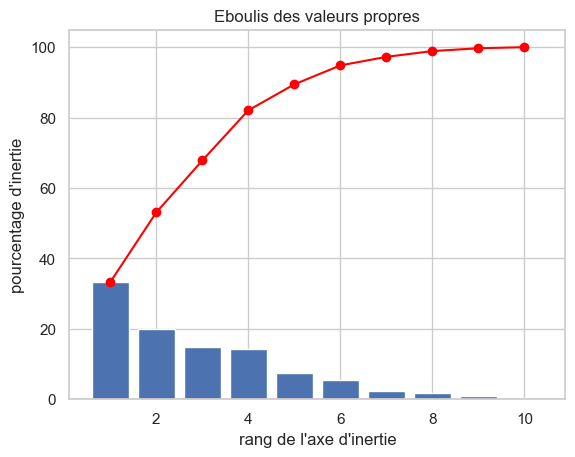

In [29]:
n_components=10
pca = PCA(n_components)
pca.fit(df_numeric_scaled)
scree = pca.explained_variance_ratio_*100
x_list = range(1, n_components+1)
plt.bar(x_list, scree)
plt.plot(x_list, scree.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

les deux premières composantes principales expliquent une part significative de la variance totale. Cette observation conduit à la décision de conserver ces deux composantes principales pour une interprétation plus approfondie.

### Cercle de corrélation pour les 2 première composantes principales

In [15]:
features = numeriq.columns

In [16]:
x, y = 0,1

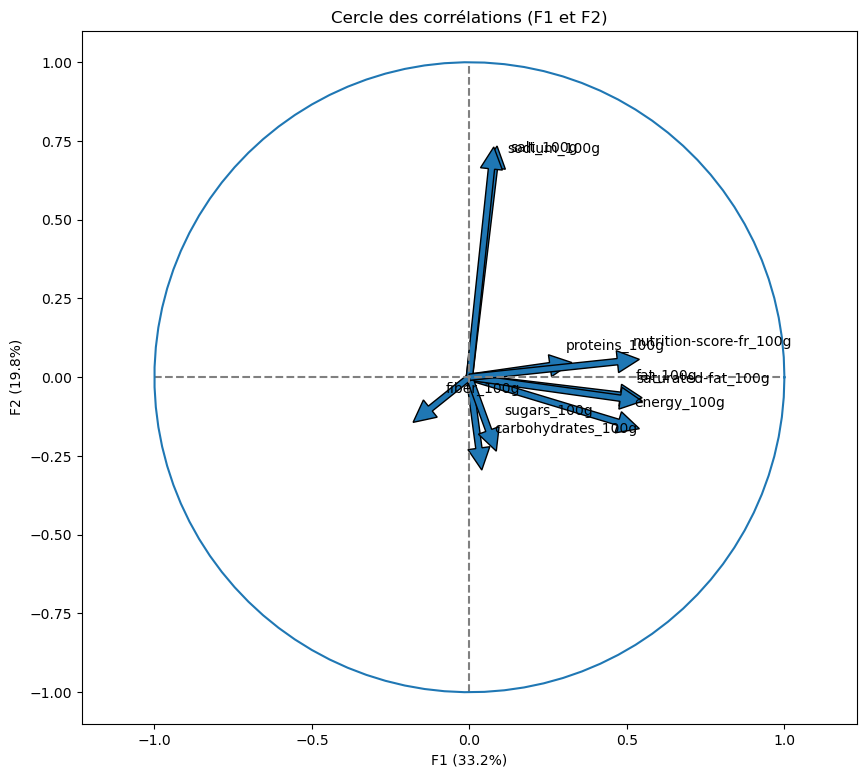

In [17]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

Il est observé que le Sodium et le sel présentent une corrélation significative entre eux, tandis qu'ils ne sont pas corrélés avec l'énergie, car ils se situent perpendiculairement sur le graphique. De plus, une relation significative entre les graisses, les graisses saturées et le score est mise en évidence, ce qui confirme les résultats obtenus à partir de la carte de corrélation. En outre, une corrélation négative est observée entre le sodium et les glucides.

### Projection 

In [24]:
X_proj = pca.transform(df_numeric_scaled)

In [33]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette=colors)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

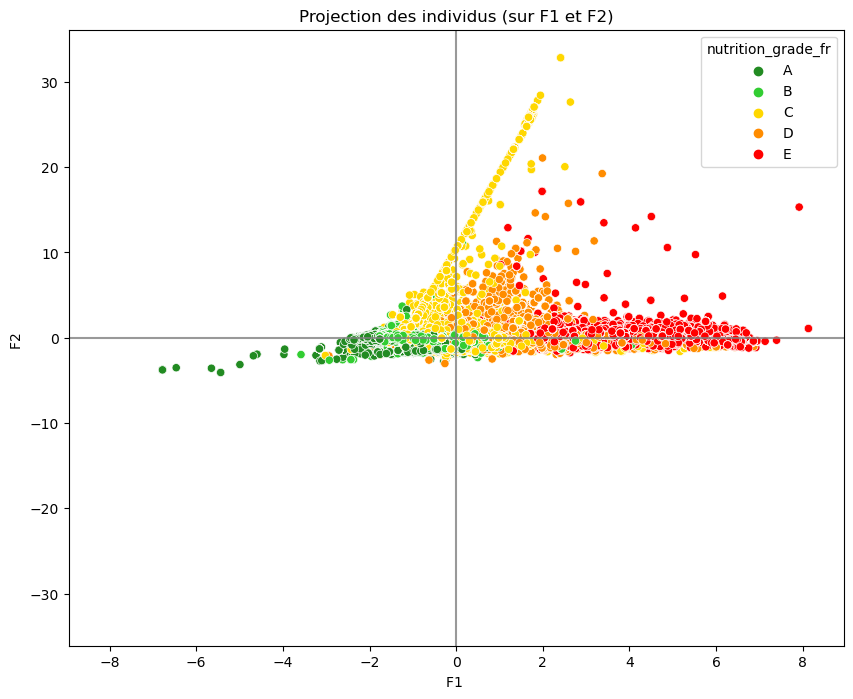

In [39]:
import seaborn as sns
order = ['A', 'B', 'C', 'D', 'E']
df['nutrition_grade_fr'] = df['nutrition_grade_fr'].astype('category').cat.reorder_categories(order)
colors = {'A': 'forestgreen', 'B': 'limegreen', 'C': 'gold', 'D': 'darkorange', 'E': 'red'}
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df['nutrition_grade_fr'])

En observant le graphique, vous remarquez que les individus associés aux grades nutritionnels A et B sont regroupés dans une zone spécifique de l'espace des composantes principales et meme chose pour D et E, tandis que ceux associés au grade C sont plus dispersés. Cela suggère que les grades (A et B) et (D et E) peuvent partager des similitudes dans leurs profils nutritionnels, tandis que le grade C est plus variable.  

Vous observez quelques points isolés associés au grade C. En analysant ces points, vous pourriez identifier des aliments spécifiques avec des profils nutritionnels atypiques par rapport aux autres dans la même catégorie de grade nutritionnel.  

Vous avez remarqué que la direction des points dans l'espace des composantes principales est alignée avec la direction des variables originales, telles que le graisse,le graisse saturé,,le sucre,et les protéines. Cela indique que ces variables contribuent fortement à la variance capturée par les composantes principales.

## ANOVA

### Composant principal PCA ET grade nutritionnel

In [30]:
component_1 = pca.transform(df_numeric_scaled)[:, 0]
df['Principal_Component_1'] = component_1
aov = pg.anova(data=df, dv='Principal_Component_1', between='nutrition_grade_fr', detailed=True)
print(aov)

               Source             SS      DF             MS              F  \
0  nutrition_grade_fr  841204.249279       4  210301.062320  294717.315028   
1              Within  229866.892300  322137       0.713569            NaN   

   p-unc       np2  
0    0.0  0.785386  
1    NaN       NaN  


 F est extrêmement élevé (108270.780127), ce qui suggère un effet significatif de "nutrition grade" sur la première composante principale.  

La valeur p est la probabilité d'observer une statistique F aussi extrême que celle calculée, sous l'hypothèse nulle que "nutrition grade" n'a pas d'effet sur la première composante principale. Une valeur p proche de zéro (0.0 dans ce cas) indique que l'effet est statistiquement significatif.  

np2  Une valeur de 0.604896 signifie que "nutrition grade" explique environ 60,49 % de la variance totale dans la première composante principale.  

### Test de Distribution

In [31]:
from scipy.stats import kstest
unique_grades = df['nutrition_grade_fr'].unique()
alpha = 0.05
for grade in unique_grades:
    sample_data = df[df['nutrition_grade_fr'] == grade]['Principal_Component_1']
    _, p_value = kstest(sample_data, 'norm')
    
    if p_value < alpha:
        print(f"F1 pour nutrition grade '{grade}' La distribution n'est pas normalement répartie (l'hypothèse nulle est rejetée).")
    else:
        print(f"F1 pour nutrition grade '{grade}' Est normalement réparti (l'hypothèse nulle n'est pas rejetée).")

F1 pour nutrition grade 'B' La distribution n'est pas normalement répartie (l'hypothèse nulle est rejetée).
F1 pour nutrition grade 'C' La distribution n'est pas normalement répartie (l'hypothèse nulle est rejetée).
F1 pour nutrition grade 'D' La distribution n'est pas normalement répartie (l'hypothèse nulle est rejetée).
F1 pour nutrition grade 'A' La distribution n'est pas normalement répartie (l'hypothèse nulle est rejetée).
F1 pour nutrition grade 'E' La distribution n'est pas normalement répartie (l'hypothèse nulle est rejetée).


### Test d'homoscédasticité 

In [32]:
from scipy.stats import f_oneway
samples = [df[df['nutrition_grade_fr'] == grade]['Principal_Component_1'] for grade in data['nutrition_grade_fr'].unique()]
statistic, p_value = f_oneway(*samples)
if p_value < alpha:
    print("L'hypothèse d'homoscédasticité est rejetée (les variances sont différentes).")
else:
    print("L'hypothèse d'homoscédasticité n'est pas rejetée (les variances sont homogènes).")

L'hypothèse d'homoscédasticité est rejetée (les variances sont différentes).


### ANOVA non paramétrique

#### Grade nutritionnel et colonnes numériques 

Le test Kruskal-Wallis est approprié pour évaluer les différences entre les groupes lorsque vous avez une variable catégorielle et des données non normalement distribuées.

In [52]:
data_grouped = [df[df['nutrition_grade_fr'] == grade] for grade in df['nutrition_grade_fr'].unique()]

In [54]:
for column in numeriq:
    print(f"Test Kruskal-Wallis pour la variable '{column}':")
    kruskal_stats = [group[column] for group in data_grouped]
    statistique_kruskal, p_value = kruskal(*kruskal_stats)
    if p_value < 0.05:
        print("Il y a des différences statistiquement significatives entre les groupes.")
    else:
        print("Il n'y a pas de différences statistiquement significatives entre les groupes.")
    print(f"Statistique de test Kruskal-Wallis : {statistique_kruskal}")
    print(f"Valeur p : {p_value}\n")

Test Kruskal-Wallis pour la variable 'energy_100g':
Il y a des différences statistiquement significatives entre les groupes.
Statistique de test Kruskal-Wallis : 149976.2578865985
Valeur p : 0.0

Test Kruskal-Wallis pour la variable 'fat_100g':
Il y a des différences statistiquement significatives entre les groupes.
Statistique de test Kruskal-Wallis : 141753.04065573792
Valeur p : 0.0

Test Kruskal-Wallis pour la variable 'saturated-fat_100g':
Il y a des différences statistiquement significatives entre les groupes.
Statistique de test Kruskal-Wallis : 155541.2836620996
Valeur p : 0.0

Test Kruskal-Wallis pour la variable 'carbohydrates_100g':
Il y a des différences statistiquement significatives entre les groupes.
Statistique de test Kruskal-Wallis : 65646.51651594695
Valeur p : 0.0

Test Kruskal-Wallis pour la variable 'sugars_100g':
Il y a des différences statistiquement significatives entre les groupes.
Statistique de test Kruskal-Wallis : 67748.12264101939
Valeur p : 0.0

Test Kru

Les résultats du test de Fisher révèlent une valeur p de 0 pour toutes les colonnes numériques, ce qui est inférieur au seuil de test de 5%. Par conséquent, nous rejetons l'hypothèse nulle (H0) suggérant que les distributions sont identiques. Ainsi, il est établi que les ingrédients de produit exerce une influence significative sur le Nutriscore.

#### Grade nutritionnel et Composante principale 

In [38]:
kruskal_result = kruskal(*[group['Principal_Component_1'] for name, group in df.groupby('nutrition_grade_fr')])
print("Kruskal-Wallis Test Statistic:", kruskal_result.statistic)
print("p-value:", kruskal_result.pvalue)
if kruskal_result.pvalue < 0.05:
    print("Il y a des différences statistiquement significatives entre les groupes.")
else:
    print("Il n'y a pas de différences statistiquement significatives entre les groupes.")

Kruskal-Wallis Test Statistic: 237767.94836656784
p-value: 0.0
Il y a des différences statistiquement significatives entre les groupes.


Les résultats du test de Fisher révèlent une valeur p de 0 pour composants principal, ce qui est inférieur au seuil de test de 5%. Par conséquent, nous rejetons l'hypothèse nulle (H0) suggérant que les distributions sont identiques. Ainsi, il est établi que le composant principal exerce une influence significative sur le Grade nutritionnel .

# Faisabilité de l'application

* On se basons sur les résultats de L'ACP peuvent servir de base pour la création de suggestions.On voit que  certaines les composantes principales sont fortement associées à des ingrédients de produits, ces informations peuvent être utilisées pour suggérer le grade nutritionnel de chaque produit.  



* Vu que le test d'ANOVA révèle des différences significatives entre les ingrédients et le  grade nutritionnel , cela peut indiquer que les ingrédients de produit est un facteur important à considérer lors de la création d'un système de suggestion. Les suggestions pourraient être adaptées en fonction les ingrédients de produit  pour améliorer la pertinence des résultats du grade nutritionnel